In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# Exploratory Data Analysis

In [3]:
df.shape

(1517, 14)

- From the data it is clear that, it  has 1514 rows i.e. different values fro different conditions and 14 different cells i. affectiing factors 
- It has two different aspects for output term i.e. region (Classification)  and Average Prize (Regression)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- The data set has 9 float values, 2 integer values and 3 object columns datasets present

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- In the datasets there is no null value present intside the datasets 

In [8]:
df.nunique()

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

- It is clear from above data that only region is a catagorical data while others are Numerical data 
- From the dataset it is clear that all the observations are fall under only one type, so 'type' doesn't make any significat role in the analysis part so we are removing that data from the model 

In [9]:
df.drop('type',axis=1, inplace=True)
df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,2015,Albany
7,7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,2015,Albany
8,8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,2015,Albany


## Univariant Data Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

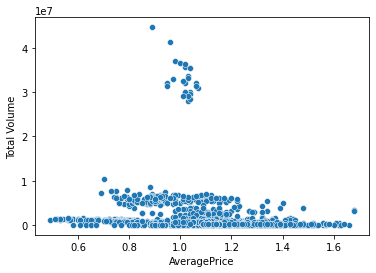

In [10]:
sns.scatterplot(data=df, x= 'AveragePrice', y= 'Total Volume')

In [11]:
df1=df.drop('Date', axis=1)
df1

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [12]:
df1

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [13]:
df2=df.drop('region', axis=1)
df2

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


51


<AxesSubplot:xlabel='region', ylabel='count'>

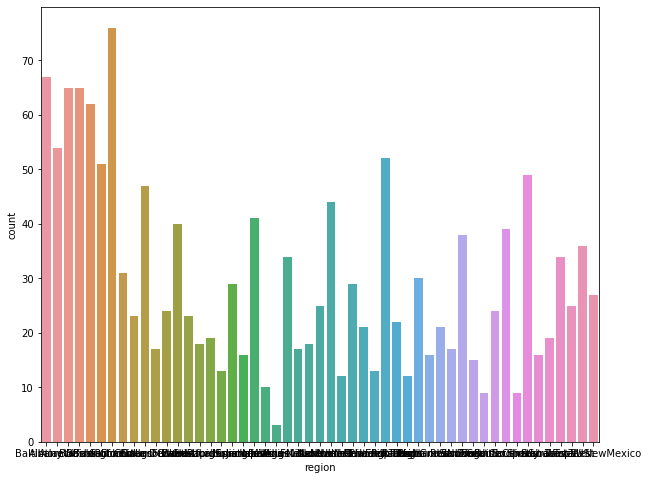

In [14]:
print(df['region'].nunique())
plt.figure(figsize=(10,8))
sns.countplot(df['region'])

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

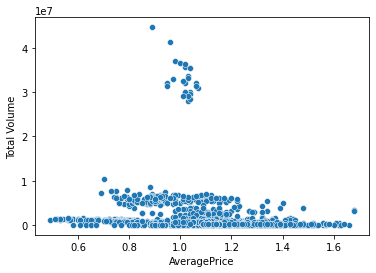

In [15]:
sns.scatterplot(df2['AveragePrice'],df2['Total Volume'])

KeyError: 'Date'

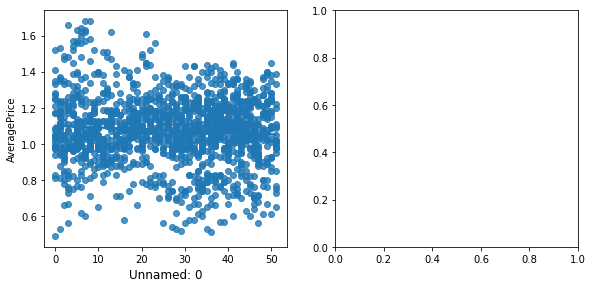

In [16]:
plt.figure(figsize=(20,20))
plot=1
for i in df2.columns[:-1]:
    if plot<=20:
        ax=plt.subplot(4,4,plot)
        sns.regplot(df1[i],df2['AveragePrice'])
        plt.xlabel(i,size=12)
    plot+=1
plt.tight_layout()

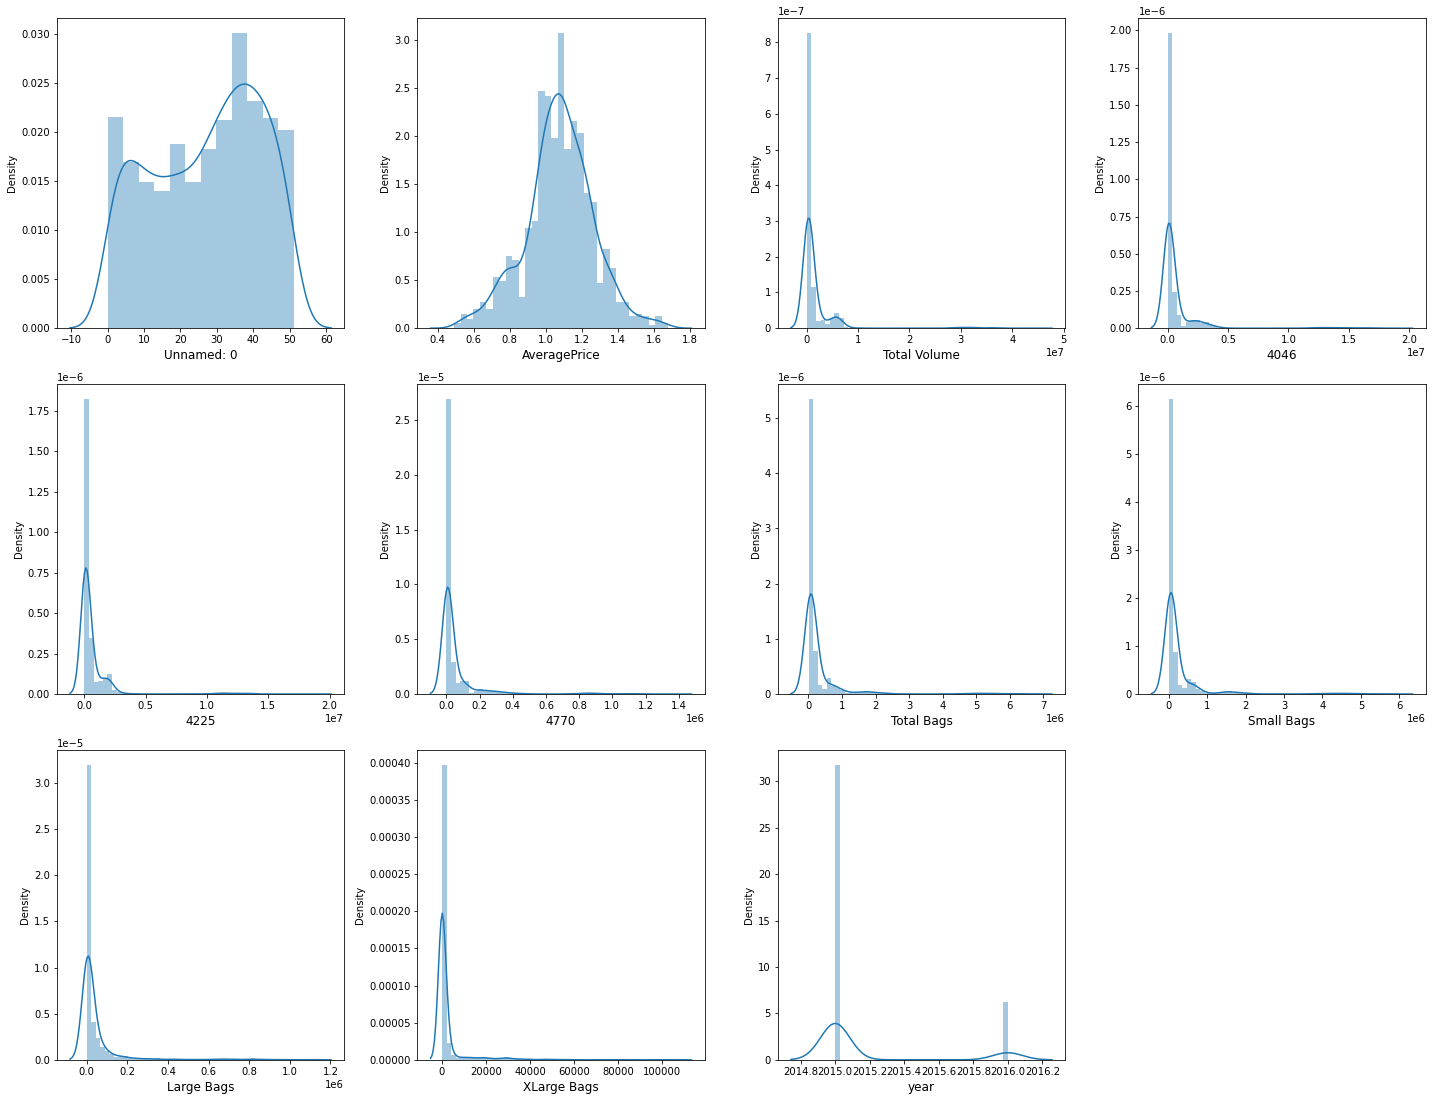

In [17]:
plt.figure(figsize=(20,20))
plot=1
for i in df1.columns[:-1]:
    if plot<=20:
        ax=plt.subplot(4,4,plot)
        sns.distplot(df1[i])#,df['AveragePrice'])
        plt.xlabel(i,size=12)
    plot+=1
plt.tight_layout()

- All the data except year (as it is catagorical data) are fall under bell shape curve, i.e. data is properly distributed around the mean value 
- 

In [18]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [19]:
df['Total Bags']=np.cbrt(df['Total Bags'])

In [20]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      2.149088
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [21]:
for i in df.columns[2:-1]:
    df[i]=np.cbrt(df[i])
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.581019
Total Volume    2.124006
4046            1.767021
4225            1.775945
4770            1.526943
Total Bags      1.162451
Small Bags      2.143413
Large Bags      1.431704
XLarge Bags     2.000670
year            1.828332
dtype: float64

- The skewness of AveragePrize and Unnamed 0 has found in the range of -1 to +1 so neednot necessary to apply the cbrt method.
- All the remaining numerical data the cuberoot method is applied and all the values are now fall under certain range which is permissible 

In [22]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,26.995386,1.020687,87.034110,55.899577,61.697175,23.983042,3.588001,47.143476,21.752360,5.018690,12.630970
std,14.848287,0.062031,50.597562,43.883362,38.557199,19.045937,0.582310,26.906904,18.750994,8.111059,0.000772
min,0.000000,0.788374,33.839713,7.762387,12.127733,0.000000,2.461035,14.905735,0.000000,0.000000,12.630630
25%,14.000000,0.993288,52.832507,27.324096,34.615119,9.694956,3.210202,30.977861,8.146971,0.000000,12.630630
50%,29.000000,1.025986,73.851654,43.400826,49.140633,19.736690,3.475458,39.658698,17.150169,0.000000,12.630630
75%,39.000000,1.059699,99.395523,72.277382,78.576397,30.782135,3.780152,52.680329,30.817404,7.377139,12.630630
max,51.000000,1.188784,354.779236,266.526320,266.636273,111.374385,5.737379,180.631953,103.883143,47.632728,12.632719


- Mean value and 50% values (median value) are nearly same so dat ais properly skewed and it is already removed from the datasets
- As standarad deviation value is less tnan mean value so it means that dat ais less spread over the range
- The difference between 75% percentile and maximum value is vary less except Unnamed 0 it means that outliears are not present in the datasets 


In [23]:
corr_df=df.corr()
corr_df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.070658,0.093474,0.102594,0.064397,0.034764,0.084597,0.081291,0.056640,-0.075756,-0.012854
AveragePrice,-0.070658,1.000000,-0.275727,-0.449242,-0.131893,-0.185490,-0.180654,-0.130515,-0.256641,-0.044196,0.156766
Total Volume,0.093474,-0.275727,1.000000,0.899550,0.948355,0.800449,0.936696,0.950591,0.810789,0.572127,0.017956
4046,0.102594,-0.449242,0.899550,1.000000,0.730688,0.720402,0.781112,0.792795,0.761843,0.494995,-0.076224
4225,0.064397,-0.131893,0.948355,0.730688,1.000000,0.762710,0.904471,0.924924,0.730504,0.535928,0.035489
4770,0.034764,-0.185490,0.800449,0.720402,0.762710,1.000000,0.750244,0.796824,0.585600,0.728007,0.055989
Total Bags,0.084597,-0.180654,0.936696,0.781112,0.904471,0.750244,1.000000,0.969034,0.797174,0.588257,0.140866
Small Bags,0.081291,-0.130515,0.950591,0.792795,0.924924,0.796824,0.969034,1.000000,0.754218,0.642202,0.163643
Large Bags,0.056640,-0.256641,0.810789,0.761843,0.730504,0.585600,0.797174,0.754218,1.000000,0.438720,-0.061347
XLarge Bags,-0.075756,-0.044196,0.572127,0.494995,0.535928,0.728007,0.588257,0.642202,0.438720,1.000000,0.224552


<AxesSubplot:>

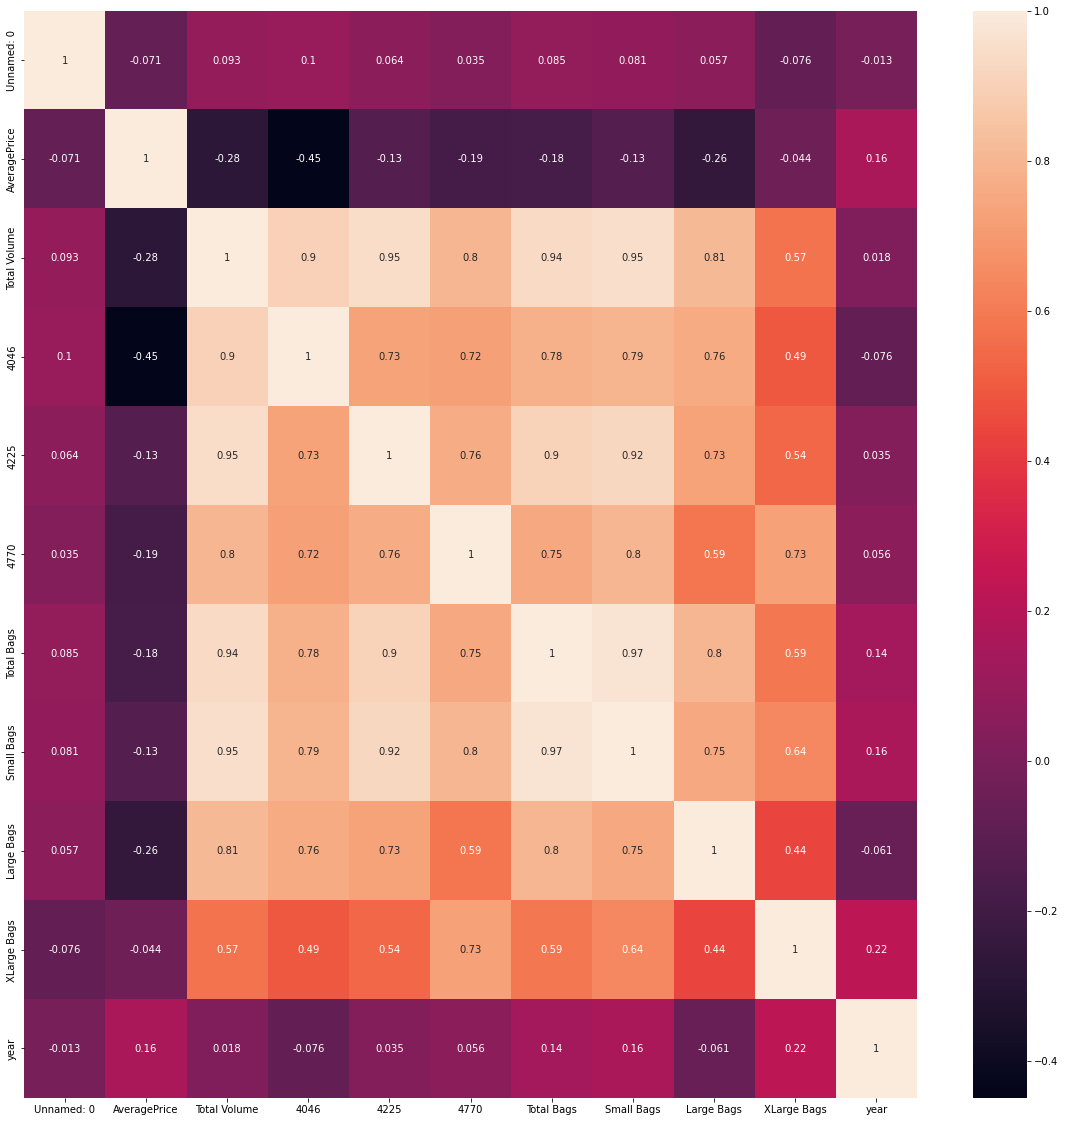

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot= True)

- Average prize has maximum negative corelation with 4046 i.e. Total number of avocados with PLU 4046 sold
- only year has positive corelation with AveragePrice and all other has negative corelation with Averageprice
- Total bags and small bags has maximum positive correlation with each other 
- Also small bags and total bags has shows strong positive corelation with 4225 catagory i.e. Total number of avocados with PLU 4225 sold
- XLarge bangs ahve positive corelation with total valumes, total number of avacados and types of bags (i.e. total,small and large)

In [25]:
df2=df2.drop('Date', axis=1)
df2

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


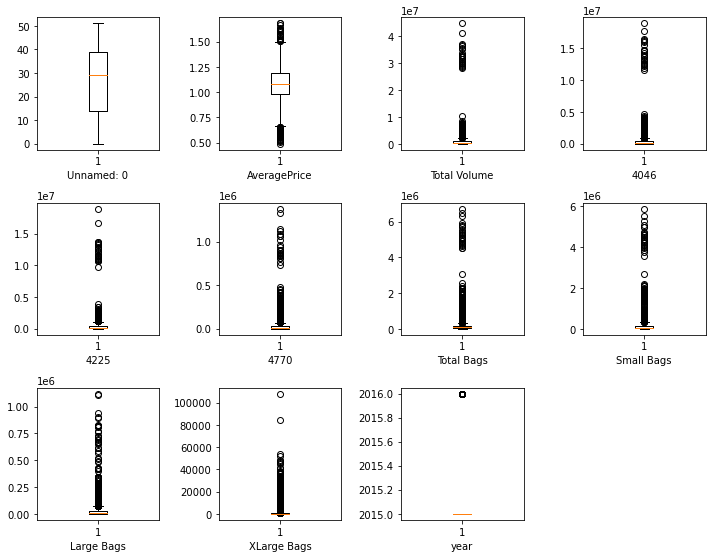

In [26]:
plt.figure(figsize=(10,10))
plot=1
for i in df2.columns:
    if plot<=15:
        ax= plt.subplot(4,4,plot)
        plt.boxplot(df2[i])
        plt.xlabel(i, size=10)
    plot+=1
plt.tight_layout()

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.81868,1.350481,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044,0.292727,0.441008
1,1.75131,1.456397,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008,0.292727,0.441008
2,1.68394,0.767838,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960,0.292727,0.441008
3,1.61657,0.026531,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701,0.292727,0.441008
4,1.54920,1.085691,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160,0.292727,0.441008
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.14498,1.668229,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213,0.260489,2.267532
1513,1.07761,2.303724,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090,0.292727,2.267532
1514,1.01024,2.144850,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953,0.182037,2.267532
1515,0.94287,2.091892,0.318784,0.304230,0.333568,0.238936,0.303098,0.298364,0.290783,0.292727,2.267532


In [28]:
dfz=df2[(z<3).all(axis=1)]
dfz

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


In [29]:
dfz.shape

(1436, 11)

In [30]:
df.shape

(1517, 13)

In [31]:
corr_dfz=dfz.corr()
corr_dfz

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.073550,0.062730,0.052975,0.048380,0.007798,0.092252,0.097119,0.048611,-0.003344,0.025650
AveragePrice,-0.073550,1.000000,-0.271504,-0.380282,-0.120872,-0.110292,-0.157514,-0.135342,-0.229402,-0.069536,0.173229
Total Volume,0.062730,-0.271504,1.000000,0.914238,0.916256,0.708447,0.875613,0.859114,0.750335,0.329997,-0.025968
4046,0.052975,-0.380282,0.914238,1.000000,0.696312,0.545078,0.665928,0.642025,0.630837,0.183037,-0.093937
4225,0.048380,-0.120872,0.916256,0.696312,1.000000,0.678638,0.853477,0.844277,0.698375,0.303602,-0.005633
4770,0.007798,-0.110292,0.708447,0.545078,0.678638,1.000000,0.730976,0.741428,0.484775,0.645120,0.044607
Total Bags,0.092252,-0.157514,0.875613,0.665928,0.853477,0.730976,1.000000,0.992654,0.791824,0.516496,0.114793
Small Bags,0.097119,-0.135342,0.859114,0.642025,0.844277,0.741428,0.992654,1.000000,0.712355,0.533439,0.132391
Large Bags,0.048611,-0.229402,0.750335,0.630837,0.698375,0.484775,0.791824,0.712355,1.000000,0.263228,-0.004649
XLarge Bags,-0.003344,-0.069536,0.329997,0.183037,0.303602,0.645120,0.516496,0.533439,0.263228,1.000000,0.132265


<AxesSubplot:>

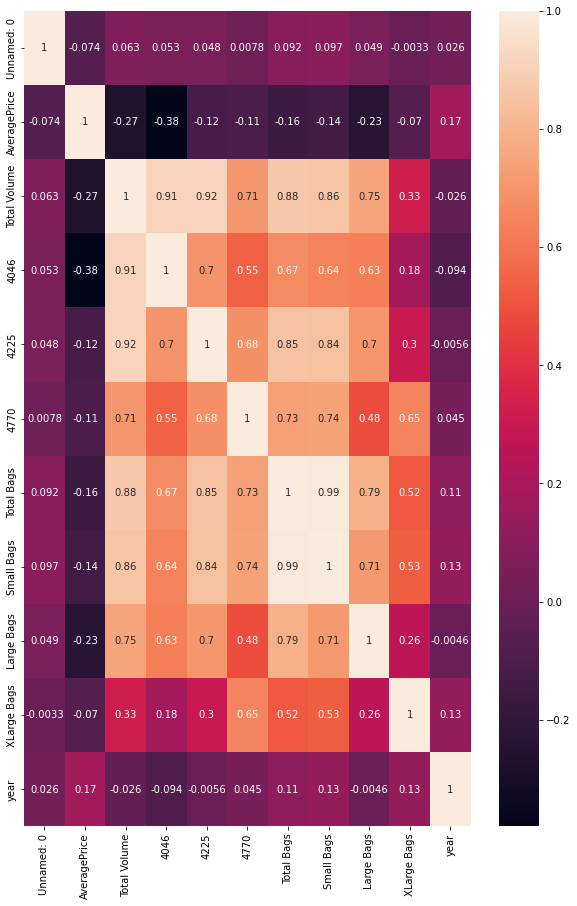

In [32]:
plt.figure(figsize=(10,15))
sns.heatmap(corr_dfz, annot= True)

In [33]:
from statsmodels .stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(dfz.values,i) for i in range(len(dfz.columns))]
vif['Features']= dfz.columns
vif

,VIF Values,Features
0,4.527280,Unnamed: 0
1,42.559590,AveragePrice
2,inf,Total Volume
3,inf,4046
4,inf,4225
5,inf,4770
6,inf,Total Bags
7,inf,Small Bags
8,inf,Large Bags
9,inf,XLarge Bags


- As all the values (except Average prize and year) gives higher VIF values but we can't neglect all values as these are input to predict the values of Average prize and region

In [34]:
print(dfz.shape, df.shape)

(1436, 11) (1517, 13)


In [35]:
dfz

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


In [36]:
x= dfz.drop('AveragePrice', axis=1)
x

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...
1512,10,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,11,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,12,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,13,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


In [37]:
y=dfz['AveragePrice']
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

# Regression Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.metrics import r2_score

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=52)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1005, 10), (431, 10), (1005,), (431,))

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr=lr.predict(x_test)
print(" Mean Absolute Error for Linear Regression = ", mean_absolute_error(y_test,y_lr))
print(" Mean Squared Error for Linear Regression = ", mean_squared_error(y_test,y_lr))
print(" r2 Score = ",r2_score(y_test,y_lr))

 Mean Absolute Error for Linear Regression =  0.13802578417691352
 Mean Squared Error for Linear Regression =  0.0316936160309073
 r2 Score =  0.16825034309878673


In [42]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr=dtr.predict(x_test)
print(" Mean Absolute Error for Decision Tree Regressor = ", mean_absolute_error(y_test,y_dtr))
print(" Mean Squared Error for Decision Tree Regressor = ", mean_squared_error(y_test,y_dtr))
print(" r2 Score = ",r2_score(y_test,y_dtr))

 Mean Absolute Error for Decision Tree Regressor =  0.07526682134570765
 Mean Squared Error for Decision Tree Regressor =  0.01337354988399072
 r2 Score =  0.6490319843367489


In [43]:
svr=SVR()
svr.fit(x_train,y_train)
y_svr=svr.predict(x_test)
print(" Mean Absolute Error for SVR = ", mean_absolute_error(y_test,y_svr))
print(" Mean Squared Error for SVR = ", mean_squared_error(y_test,y_svr))
print(" r2 Score = ",r2_score(y_test,y_svr))

 Mean Absolute Error for SVR =  0.10657412984329011
 Mean Squared Error for SVR =  0.01906119129382625
 r2 Score =  0.49976868201761593


In [44]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
print(" Mean Absolute Error for KNN = ", mean_absolute_error(y_test,y_knn))
print(" Mean Squared Error for KNN = ", mean_squared_error(y_test,y_knn))
print(" r2 Score = ",r2_score(y_test,y_knn))

 Mean Absolute Error for KNN =  0.07476102088167054
 Mean Squared Error for KNN =  0.011382895591647334
 r2 Score =  0.7012736100020214


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
for i in range(2,10):
    score=cross_val_score(knn,x,y,cv=i)
    sic=score.mean()
    print(" At Cv= ",i)
    print("value of Cross_Val_Function = ",score)
    print(" Mean Value of Error = ", sic)

 At Cv=  2
value of Cross_Val_Function =  [-0.63891365  0.18607992]
 Mean Value of Error =  -0.22641686922798543
 At Cv=  3
value of Cross_Val_Function =  [-0.05449712 -0.04654566  0.14171329]
 Mean Value of Error =  0.013556837227053512
 At Cv=  4
value of Cross_Val_Function =  [-0.41595274 -0.52841192  0.18081436  0.29842794]
 Mean Value of Error =  -0.1162805907002234
 At Cv=  5
value of Cross_Val_Function =  [-0.97982463  0.24653703  0.33194299 -0.13656744  0.35168145]
 Mean Value of Error =  -0.0372461205814965
 At Cv=  6
value of Cross_Val_Function =  [-1.19803024  0.32703816 -1.06282855  0.45620969 -0.17020609  0.34505279]
 Mean Value of Error =  -0.21712737331179324
 At Cv=  7
value of Cross_Val_Function =  [-1.04158248 -0.05478616  0.07906797  0.48936618 -1.20822739  0.31936375
  0.17547378]
 Mean Value of Error =  -0.17733205105672703
 At Cv=  8
value of Cross_Val_Function =  [-0.99474933 -0.23066665  0.43702464 -1.04905135  0.50138539 -0.43992371
  0.52542973  0.08506508]
 M

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import ExtraTreesRegressor

In [49]:
etc=ExtraTreesRegressor()
etc.fit(x_train,y_train)
y_etc=etc.predict(x_test)
print(" Mean Absolute Error for ETC = ", mean_absolute_error(y_test,y_etc))
print(" Mean Squared Error for ETC = ", mean_squared_error(y_test,y_etc))
print(" r2 Score = ",r2_score(y_test,y_etc))

 Mean Absolute Error for ETC =  0.04723874709976798
 Mean Squared Error for ETC =  0.004169723132250585
 r2 Score =  0.8905721019261307


In [50]:
for i in range(2,10):
    score=cross_val_score(etc,x,y,cv=i)
    sic=score.mean()
    print(" At Cv= ",i)
    print("value of Cross_Val_Function = ",score)
    print(" Mean Value of Error = ", sic)

 At Cv=  2
value of Cross_Val_Function =  [-0.27173066  0.32910905]
 Mean Value of Error =  0.028689197142181544
 At Cv=  3
value of Cross_Val_Function =  [0.42223275 0.34763749 0.258496  ]
 Mean Value of Error =  0.3427887455359359
 At Cv=  4
value of Cross_Val_Function =  [ 0.25361949 -0.06433752  0.45956976  0.3284726 ]
 Mean Value of Error =  0.24433108208148183
 At Cv=  5
value of Cross_Val_Function =  [-0.16947839  0.4643122   0.39554133  0.32447876  0.28046493]
 Mean Value of Error =  0.2590637673701842
 At Cv=  6
value of Cross_Val_Function =  [-0.33889564  0.68397875 -0.70348437  0.64106641  0.37066042  0.28772729]
 Mean Value of Error =  0.156842145242841
 At Cv=  7
value of Cross_Val_Function =  [-0.05525417  0.57971816  0.28758783  0.45529869 -0.09514507  0.62895464
 -0.82709975]
 Mean Value of Error =  0.13915147610265952
 At Cv=  8
value of Cross_Val_Function =  [ 0.01136227  0.38634112  0.56281094 -0.76159379  0.69889233  0.02221739
  0.71981945 -0.47910956]
 Mean Value 

In [51]:
br=BaggingRegressor()
br.fit(x_train,y_train)
y_br=br.predict(x_test)
print(" Mean Absolute Error for BR = ", mean_absolute_error(y_test,y_br))
print(" Mean Squared Error for BR = ", mean_squared_error(y_test,y_br))
print(" r2 Score = ",r2_score(y_test,y_br))

 Mean Absolute Error for BR =  0.0644106728538283
 Mean Squared Error for BR =  0.007689366589327143
 r2 Score =  0.7982045338019004


In [52]:
for i in range(2,10):
    score=cross_val_score(br,x,y,cv=i)
    sic=score.mean()
    print(" At Cv= ",i)
    print("value of Cross_Val_Function = ",score)
    print(" Mean Value of Error = ", sic)

 At Cv=  2
value of Cross_Val_Function =  [-0.34890889  0.31804145]
 Mean Value of Error =  -0.0154337198895802
 At Cv=  3
value of Cross_Val_Function =  [0.21347687 0.36146499 0.2587495 ]
 Mean Value of Error =  0.2778971160364901
 At Cv=  4
value of Cross_Val_Function =  [ 0.09437793 -0.0196322   0.48910641  0.31969748]
 Mean Value of Error =  0.2208874044159946
 At Cv=  5
value of Cross_Val_Function =  [-0.44253902  0.21447322  0.48756436  0.272725    0.34120039]
 Mean Value of Error =  0.1746847918123032
 At Cv=  6
value of Cross_Val_Function =  [-0.59970345  0.46337032 -0.28161874  0.59886437  0.32172531  0.32120512]
 Mean Value of Error =  0.13730715207288152
 At Cv=  7
value of Cross_Val_Function =  [-0.34261407  0.21273352  0.05555133  0.65326015 -0.11627338  0.48090624
 -0.13048991]
 Mean Value of Error =  0.11615341281829071
 At Cv=  8
value of Cross_Val_Function =  [-5.10505354e-01  2.67011692e-01  4.80541807e-01 -4.61294573e-01
  6.69325632e-01  4.10420035e-05  6.21599644e-

- As the absolute error in the Bagging Regression (BR) model is less as compare to rest of all operation so we considered same model for further operations also difference between cross value function value and absolute error is less as compair to others 

# Classification Model

In [62]:
df1

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [63]:
oe= OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=oe.fit_transform(df1[i].values.reshape(-1,1))
df1

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7.0
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7.0
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7.0
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7.0


In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.81868,1.350481,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044,0.292727,0.441008,1.314338
1,1.75131,1.456397,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008,0.292727,0.441008,1.314338
2,1.68394,0.767838,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960,0.292727,0.441008,1.314338
3,1.61657,0.026531,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701,0.292727,0.441008,1.314338
4,1.54920,1.085691,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160,0.292727,0.441008,1.314338
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.14498,1.668229,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213,0.260489,2.267532,0.880286
1513,1.07761,2.303724,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090,0.292727,2.267532,0.880286
1514,1.01024,2.144850,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953,0.182037,2.267532,0.880286
1515,0.94287,2.091892,0.318784,0.304230,0.333568,0.238936,0.303098,0.298364,0.290783,0.292727,2.267532,0.880286


In [67]:
df3=df1[(z<3).all(axis=1)]
df3

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7.0
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7.0
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7.0
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7.0


In [72]:
xx=df3.drop('region',axis=1)
xx

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


In [75]:
yy=df3['region']
yy

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1512    7.0
1513    7.0
1514    7.0
1515    7.0
1516    7.0
Name: region, Length: 1436, dtype: float64

In [74]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.3, random_state=52)

In [79]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Logistic Regression

In [80]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_lr=lg.predict(x_test)
print("Accuarcy of Logistic Regression = ", accuracy_score(y_test,y_lr))
print("Confusion Matrix of Logistic Regression = \n", confusion_matrix(y_test,y_lr))
print("Classification Matrix of Logistic Regression = \n", classification_report(y_test,y_lr))

Accuarcy of Logistic Regression =  0.44547563805104406
Confusion Matrix of Logistic Regression = 
 [[ 0  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  1  5]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  9]]
Classification Matrix of Logistic Regression = 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.24      0.53      0.33        15
         2.0       0.57      1.00      0.73        20
         3.0       0.69      0.61      0.65        18
         4.0       0.35      0.64      0.45        14
         5.0       0.57      0.87      0.68        15
         6.0       0.20      0.71      0.31        14
         7.0       0.50      0.20      0.29        10
         8.0       1.00      0.88      0.93         8
         9.0       1.00      0.55      0.71        20
        10.0       0.25      0.20      0.22         5
        11.0       0.91      0.91      0.91    

### Decision Tree Classifier

In [81]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_dtc=dtc.predict(x_test)
print("Accuarcy of Decision Tree Classifier = ", accuracy_score(y_test,y_dtc))
print("Confusion Matrix of Decision Tree Classifier = \n", confusion_matrix(y_test,y_dtc))
print("Classification Matrix of Decision Tree Classifier = \n", classification_report(y_test,y_dtc))

Accuarcy of Decision Tree Classifier =  0.8468677494199536
Confusion Matrix of Decision Tree Classifier = 
 [[16  0  0 ...  0  0  0]
 [ 0 13  0 ...  1  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  7]]
Classification Matrix of Decision Tree Classifier = 
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        19
         1.0       0.87      0.87      0.87        15
         2.0       0.73      0.95      0.83        20
         3.0       0.75      1.00      0.86        18
         4.0       1.00      0.71      0.83        14
         5.0       1.00      1.00      1.00        15
         6.0       1.00      1.00      1.00        14
         7.0       0.89      0.80      0.84        10
         8.0       0.89      1.00      0.94         8
         9.0       1.00      0.80      0.89        20
        10.0       0.67      0.80      0.73         5
        11.0       0.80      0.73

### KNN Classifier

In [82]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
print("Accuarcy of KNN Classifier = ", accuracy_score(y_test,y_knn))
print("Confusion Matrix of KNN Classifier = \n", confusion_matrix(y_test,y_knn))
print("Classification Matrix of KNN Classifier = \n", classification_report(y_test,y_knn))

Accuarcy of KNN Classifier =  0.802784222737819
Confusion Matrix of KNN Classifier = 
 [[18  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  1  0 ...  7  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  6]]
Classification Matrix of KNN Classifier = 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.77      0.67      0.71        15
         2.0       0.86      0.90      0.88        20
         3.0       1.00      0.94      0.97        18
         4.0       0.57      0.86      0.69        14
         5.0       0.94      1.00      0.97        15
         6.0       0.91      0.71      0.80        14
         7.0       0.75      0.90      0.82        10
         8.0       1.00      1.00      1.00         8
         9.0       1.00      1.00      1.00        20
        10.0       0.57      0.80      0.67         5
        11.0       0.90      0.82      0.86        11
        12

### Support Vector Classifier

In [83]:
svc= SVC()
svc.fit(x_train,y_train)
y_svc=svc.predict(x_test)
print("Accuarcy of Support Vector Classifier = ", accuracy_score(y_test,y_svc))
print("Confusion Matrix of Support Vector Classifier = \n", confusion_matrix(y_test,y_svc))
print("Classification Matrix of Support Vector Classifier = \n", classification_report(y_test,y_svc))

Accuarcy of Support Vector Classifier =  0.3062645011600928
Confusion Matrix of Support Vector Classifier = 
 [[19  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 3  5  0 ...  0  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  1  0 ...  0  0  0]]
Classification Matrix of Support Vector Classifier = 
               precision    recall  f1-score   support

         0.0       0.10      1.00      0.19        19
         1.0       0.27      1.00      0.43        15
         2.0       0.46      0.80      0.58        20
         3.0       0.00      0.00      0.00        18
         4.0       0.30      0.93      0.45        14
         5.0       0.00      0.00      0.00        15
         6.0       1.00      0.43      0.60        14
         7.0       0.00      0.00      0.00        10
         8.0       0.00      0.00      0.00         8
         9.0       0.00      0.00      0.00        20
        10.0       0.00      0.00      0.00         5
        11.0       0.00      0

### Gradient Boosting Classifier, Ada Boost Classifier, Bagging Classifier

In [84]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_gbc=gbc.predict(x_test)
print("Accuarcy of Gradient Boosting Classifier = ", accuracy_score(y_test,y_gbc))
print("Confusion Matrix of Gradient Boosting Classifier = \n", confusion_matrix(y_test,y_gbc))
print("Classification Matrix of Gradient Boosting Classifier = \n", classification_report(y_test,y_gbc))

Accuarcy of Gradient Boosting Classifier =  0.888631090487239
Confusion Matrix of Gradient Boosting Classifier = 
 [[18  0  0 ...  0  0  0]
 [ 0 14  0 ...  1  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  7]]
Classification Matrix of Gradient Boosting Classifier = 
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        19
         1.0       0.74      0.93      0.82        15
         2.0       0.87      1.00      0.93        20
         3.0       0.94      0.89      0.91        18
         4.0       1.00      0.93      0.96        14
         5.0       1.00      1.00      1.00        15
         6.0       1.00      0.86      0.92        14
         7.0       0.91      1.00      0.95        10
         8.0       1.00      0.75      0.86         8
         9.0       1.00      1.00      1.00        20
        10.0       1.00      1.00      1.00         5
        11.0       0.8

In [87]:
bg= BaggingClassifier()
bg.fit(x_train,y_train)
y_bg=bg.predict(x_test)
print("Accuarcy of Bagging Classifier = ", accuracy_score(y_test,y_bg))
print("Confusion Matrix of Bagging Classifier = \n", confusion_matrix(y_test,y_bg))
print("Classification Matrix of Bagging Classifier = \n", classification_report(y_test,y_bg))

Accuarcy of Bagging Classifier =  0.9373549883990719
Confusion Matrix of Bagging Classifier = 
 [[18  0  0 ...  0  0  0]
 [ 0 14  0 ...  1  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  9]]
Classification Matrix of Bagging Classifier = 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.88      0.93      0.90        15
         2.0       0.95      1.00      0.98        20
         3.0       0.86      1.00      0.92        18
         4.0       1.00      0.86      0.92        14
         5.0       1.00      1.00      1.00        15
         6.0       0.93      1.00      0.97        14
         7.0       0.90      0.90      0.90        10
         8.0       1.00      1.00      1.00         8
         9.0       1.00      0.95      0.97        20
        10.0       0.83      1.00      0.91         5
        11.0       1.00      0.91      0.95        

In [88]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_etc=etc.predict(x_test)
print("Accuarcy of Extra Tree Classifier = ", accuracy_score(y_test,y_etc))
print("Confusion Matrix of Extra Tree Classifier = \n", confusion_matrix(y_test,y_etc))
print("Classification Matrix of Extra Tree Classifier = \n", classification_report(y_test,y_etc))

Accuarcy of Extra Tree Classifier =  0.9837587006960556
Confusion Matrix of Extra Tree Classifier = 
 [[19  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  9]]
Classification Matrix of Extra Tree Classifier = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        15
         2.0       0.95      1.00      0.98        20
         3.0       1.00      1.00      1.00        18
         4.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00        15
         6.0       1.00      1.00      1.00        14
         7.0       1.00      1.00      1.00        10
         8.0       1.00      1.00      1.00         8
         9.0       1.00      1.00      1.00        20
        10.0       1.00      1.00      1.00         5
        11.0       1.00      1.00      1.0

# Cross Value Score

In [90]:
from sklearn.model_selection import cross_val_score

In [92]:
for j in range(2,10):
    score=cross_val_score(etc,xx,yy,cv=j)
    sic=score.mean()
    print(" At Cv= ",j)
    print("value of Cross_Val_Function = ",score)
    print(" Mean Value of Error = ", sic)

 At Cv=  2
value of Cross_Val_Function =  [0.73955432 0.76880223]
 Mean Value of Error =  0.7541782729805014
 At Cv=  3
value of Cross_Val_Function =  [0.79749478 0.95615866 0.85983264]
 Mean Value of Error =  0.8711620268865575
 At Cv=  4
value of Cross_Val_Function =  [0.85793872 0.94150418 0.98607242 0.90250696]
 Mean Value of Error =  0.9220055710306406
 At Cv=  5
value of Cross_Val_Function =  [0.87847222 0.96167247 0.99303136 0.98606272 0.94773519]
 Mean Value of Error =  0.9533947928765002
 At Cv=  6
value of Cross_Val_Function =  [0.92916667 0.95833333 0.94560669 0.9832636  0.9916318  0.93305439]
 Mean Value of Error =  0.9568427475592748
 At Cv=  7
value of Cross_Val_Function =  [0.9368932  0.98536585 0.97560976 0.98536585 0.9804878  0.9804878
 0.95609756]
 Mean Value of Error =  0.9714725482899766
 At Cv=  8
value of Cross_Val_Function =  [0.92777778 0.97777778 0.98333333 0.97777778 0.99441341 0.98324022
 0.99441341 0.96089385]
 Mean Value of Error =  0.9749534450651769
 At C

# Hyper Tuning Parameter

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
parameters={'criterion': ['gini','entropy'],
           'random_state':[10,50,100],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [97]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [98]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [99]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [100]:
Final_model=ExtraTreesClassifier(criterion= 'entropy',max_depth= 20, n_estimators= 300, n_jobs= -2, random_state= 10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,y_etc))
print(confusion_matrix(y_test,y_etc))
print(classification_report(y_test,y_etc))
acc=accuracy_score(y_test,pred)
print(acc*100)

0.9837587006960556
[[19  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        15
         2.0       0.95      1.00      0.98        20
         3.0       1.00      1.00      1.00        18
         4.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00        15
         6.0       1.00      1.00      1.00        14
         7.0       1.00      1.00      1.00        10
         8.0       1.00      1.00      1.00         8
         9.0       1.00      1.00      1.00        20
        10.0       1.00      1.00      1.00         5
        11.0       1.00      1.00      1.00        11
        12.0       1.00      1.00      1.00         9
        13.0       1.00      1.00      1.00         9
        14.0  

In [101]:
pred

array([32.,  6., 26., 22., 35., 32.,  0., 22., 38.,  0.,  9.,  2., 19.,
        5., 25.,  2.,  0., 17.,  0., 31., 43., 39., 49.,  2., 42., 19.,
       13., 25., 34., 18., 25.,  9., 44.,  3.,  2., 25., 17.,  8., 50.,
        1., 26., 50., 50., 50.,  6.,  3., 45.,  4., 31., 26., 13.,  5.,
       26., 22., 50., 29., 24.,  2.,  0., 19.,  3., 43., 11., 34.,  7.,
       18.,  0., 19.,  2.,  3., 31., 49., 26., 41., 46., 44.,  6., 44.,
        3., 26., 10.,  0., 29., 12., 25., 43., 14.,  1., 11., 43., 34.,
        2.,  6.,  4., 10., 46., 39., 32.,  9., 27.,  5.,  2.,  5., 19.,
        3.,  9.,  2.,  1.,  5., 12., 28., 43.,  0., 32., 25.,  7., 26.,
       11., 34., 47., 31.,  9., 15., 31., 11., 36., 32., 38.,  0.,  4.,
       26., 38.,  4., 13., 28.,  3., 31., 44.,  7., 38.,  3.,  5., 36.,
       34.,  4.,  4., 26., 13., 18., 42.,  1., 39.,  5.,  8.,  2., 42.,
       37., 27., 47.,  8.,  9., 38.,  1., 14., 15.,  6., 31., 31.,  3.,
       31.,  0., 36.,  6., 47., 47., 42.,  0., 19., 12., 31., 19

In [102]:
y_test

815     32.0
204      6.0
667     26.0
547     22.0
889     35.0
        ... 
1135    46.0
330     11.0
1435     5.0
654     26.0
452     17.0
Name: region, Length: 431, dtype: float64

In [105]:
output=pd.DataFrame()

In [107]:
output['Actual output']= y_test
output['Predicted output']=pred

In [108]:
output

,Actual output,Predicted output
815,32.0,32.0
204,6.0,6.0
667,26.0,26.0
547,22.0,22.0
889,35.0,35.0
...,...,...
1135,46.0,46.0
330,11.0,11.0
1435,5.0,5.0
654,26.0,26.0
